### **1.Importing Libraries**

In [53]:
from google.colab import drive
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
import tensorflow as tf
import matplotlib.pyplot as plt

### **2. Loading custom dataset**

In [54]:
dataset_path = '/content/drive/MyDrive/custom_dataset'

### **3.Data augmentation**

In [55]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
])

In [56]:
batch_size = 32

### **4.Creating a training dataset**

In [57]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=(224, 224),
    batch_size=batch_size,
)

Found 41 files belonging to 4 classes.
Using 33 files for training.


### **5.Creating a validation dataset**

In [58]:
ds_val = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=(224, 224),
    batch_size=batch_size,
)

Found 41 files belonging to 4 classes.
Using 8 files for validation.


In [81]:
for images, labels in ds_train.take(1):
    print("Image shape:", images[0].shape)

Image shape: (224, 224, 3)


### **visualizing images**

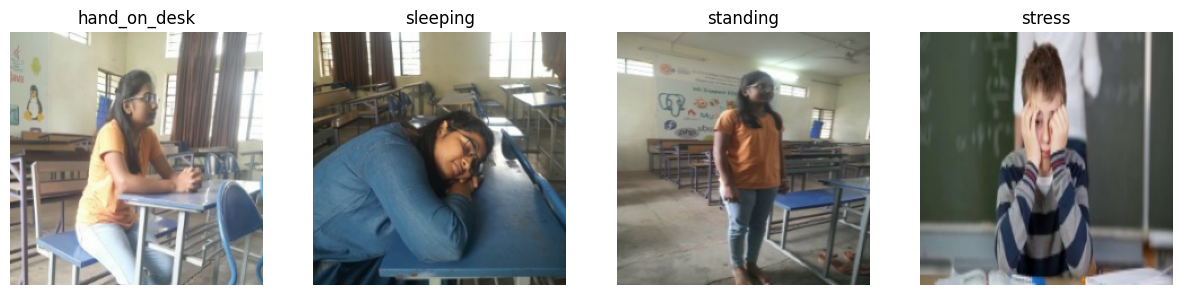

In [80]:

class_images_train = []
class_labels_train = []

# Get one image and label for each class from the training dataset
for class_idx, class_name in enumerate(class_names):
    # Find the first image with the current class label
    for images, labels in ds_train:
        for i, label in enumerate(labels):
            if label == class_idx:
                image = images[i]
                break
        break
    class_images_train.append(image)
    class_labels_train.append(class_idx)

# Plot class labels versus images from the training dataset
plot_class_images(class_images_train, class_labels_train)


In [59]:
# Load pre-trained EfficientNetB0 without top layers
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [60]:
# Freeze the base model layers
base_model.trainable = False

### **6. Building custom model on top of the pre-trained base model**

In [61]:
num_classes= 4
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation='softmax')  # num_classes is the number of classes in your dataset
])

### **7. Compiling the model**

In [62]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### **8. Training the model**

In [63]:
epochs = 100 # number of epochs
model.fit(ds_train, epochs=epochs, validation_data=ds_val)

Epoch 1/100
2/2 [==============================] - 13s 3s/step - loss: 1.3945 - accuracy: 0.3939 - val_loss: 1.0764 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 2s 455ms/step - loss: 1.2228 - accuracy: 0.4242 - val_loss: 1.1455 - val_accuracy: 0.3750
Epoch 3/100
2/2 [==============================] - 4s 1s/step - loss: 1.1332 - accuracy: 0.3939 - val_loss: 1.2132 - val_accuracy: 0.3750
Epoch 4/100
2/2 [==============================] - 3s 462ms/step - loss: 1.0812 - accuracy: 0.3939 - val_loss: 1.2700 - val_accuracy: 0.3750
Epoch 5/100
2/2 [==============================] - 2s 496ms/step - loss: 1.0368 - accuracy: 0.5152 - val_loss: 1.3232 - val_accuracy: 0.3750
Epoch 6/100
2/2 [==============================] - 3s 701ms/step - loss: 0.9766 - accuracy: 0.5455 - val_loss: 1.3575 - val_accuracy: 0.3750
Epoch 7/100
2/2 [==============================] - 2s 457ms/step - loss: 0.9429 - accuracy: 0.6667 - val_loss: 1.3742 - val_accuracy: 0.3750
Epoch 8/100
2/2 [=

**9. Evaluating the model on the test dataset**

In [64]:
test_loss, test_accuracy = model.evaluate(ds_val)
test_accuracy_percentage = test_accuracy * 100
print(f'Test accuracy: {test_accuracy_percentage:.2f}%')

1/1 [==============================] - 0s 431ms/step - loss: 0.5427 - accuracy: 0.7500
Test accuracy: 75.00%


**10.Predicting**

1/1 [==============================] - 2s 2s/step


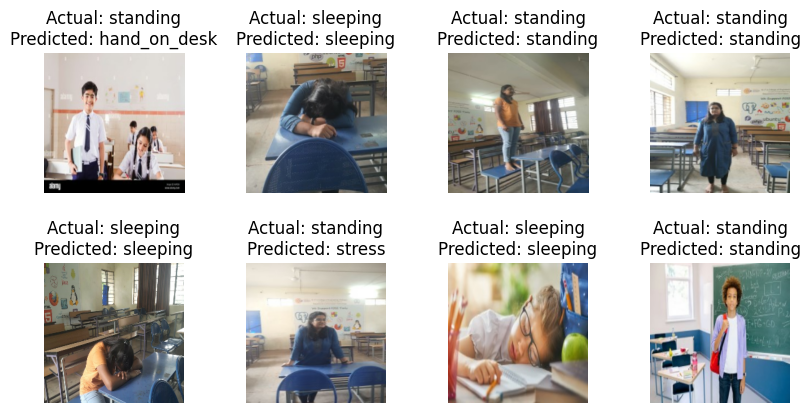

In [65]:
import matplotlib.pyplot as plt

# dataset has 4 classes
class_names = ['hand_on_desk', 'sleeping', 'standing', 'stress']

# Function to plot images with actual and predicted class labels
def plot_images(images, labels, predictions=None):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        actual_label = class_names[labels[i]]
        if predictions is not None:
            predicted_label = class_names[predictions[i]]
            plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}')
        else:
            plt.title(f'Actual: {actual_label}')
        plt.axis("off")
    plt.subplots_adjust(hspace=0.5)  # Adjust the vertical space between subplots
    plt.show()

# Get a batch of images and labels from the validation dataset
for images, labels in ds_val.take(1):
    # Make predictions using the model
    predictions = model.predict(images)
    predicted_classes = tf.argmax(predictions, axis=1)

    # Plot the images with actual and predicted class labels
    plot_images(images, labels, predicted_classes)
